In [7]:
!pip install pandas matplotlib seaborn missingno
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import missingno as msno

pd.set_option('display.max_columns', None)
sns.set(style='whitegrid')
print(" Chargement des biblioth√®ques...")

 Chargement des biblioth√®ques...


In [10]:
# --- 2. Statistiques descriptives ---

train = pd.read_csv("Data/raw/airbnb_train.csv")  # Adapter le chemin si n√©cessaire

# --- 1. Aper√ßu g√©n√©ral ---
print(" Structure du dataset :")
display(train.info())
display(train.describe().T.round(2))

 Structure du dataset :
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22234 entries, 0 to 22233
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      22234 non-null  int64  
 1   log_price               22234 non-null  float64
 2   property_type           22234 non-null  object 
 3   room_type               22234 non-null  object 
 4   amenities               22234 non-null  object 
 5   accommodates            22234 non-null  int64  
 6   bathrooms               22183 non-null  float64
 7   bed_type                22234 non-null  object 
 8   cancellation_policy     22234 non-null  object 
 9   cleaning_fee            22234 non-null  bool   
 10  city                    22234 non-null  object 
 11  description             22234 non-null  object 
 12  first_review            17509 non-null  object 
 13  host_has_profile_pic    22178 non-null  object 
 14  host_identity_

None

count         mean         std      min         25%  \
id                    22234.0  11222692.18  6080480.28  3362.00  6202924.25   
log_price             22234.0         4.78        0.72     2.30        4.32   
accommodates          22234.0         3.16        2.14     1.00        2.00   
bathrooms             22183.0         1.24        0.59     0.00        1.00   
latitude              22234.0        38.46        3.07    33.34       34.14   
longitude             22234.0       -92.27       21.67  -122.51     -118.34   
number_of_reviews     22234.0        20.67       37.18     0.00        1.00   
review_scores_rating  17256.0        94.07        7.78    20.00       92.00   
bedrooms              22208.0         1.26        0.85     0.00        1.00   
beds                  22199.0         1.71        1.25     0.00        1.00   

                              50%          75%          max  
id                    12174250.00  16395021.50  21204503.00  
log_price                    4.70         5.22         7.60  
accommodates                 2.00         4.00        16.00  
bathrooms                    1.00         1.00         8.00  
latitude                    40.66        40.75        42.39  
longitude                  -76.99       -73.95       -70.99  
number_of_reviews            6.00        23.00       505.00  
review_scores_rating        96.00       100.00       100.00  
bedrooms                     1.00         1.00        10.00  
beds                         1.00         2.00        18.00

In [12]:
# --- 3. Valeurs manquantes ---
print(" Valeurs manquantes :")
missing = train.isnull().mean().sort_values(ascending=False) * 100
missing = missing[missing > 0]
display(missing.round(2))

 Valeurs manquantes :


host_response_rate        24.62
review_scores_rating      22.39
first_review              21.25
last_review               21.21
neighbourhood              9.38
zipcode                    1.36
host_identity_verified     0.25
host_since                 0.25
host_has_profile_pic       0.25
bathrooms                  0.23
beds                       0.16
bedrooms                   0.12
dtype: float64

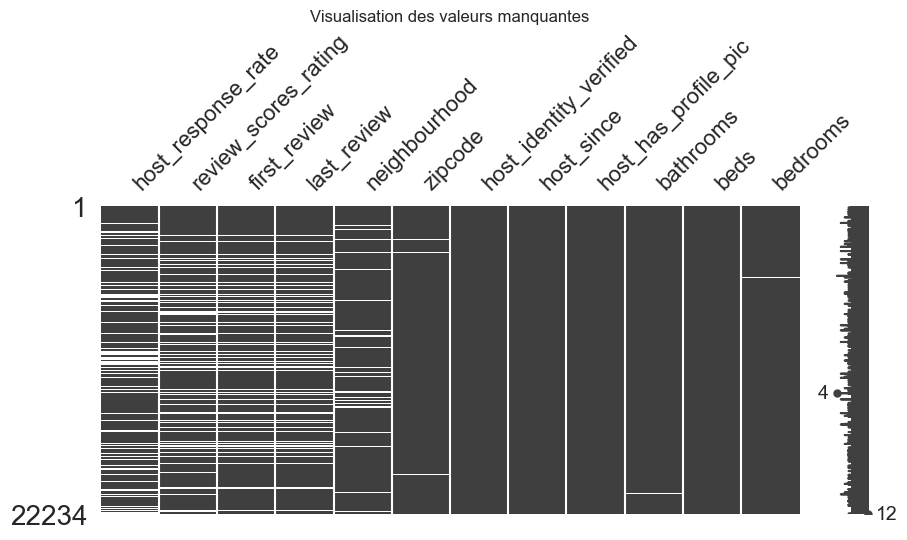

In [13]:
# üîç Affichage graphique des valeurs manquantes
if not missing.empty:
    msno.matrix(train[missing.index], figsize=(10, 4))
    plt.title("Visualisation des valeurs manquantes")
    plt.show()

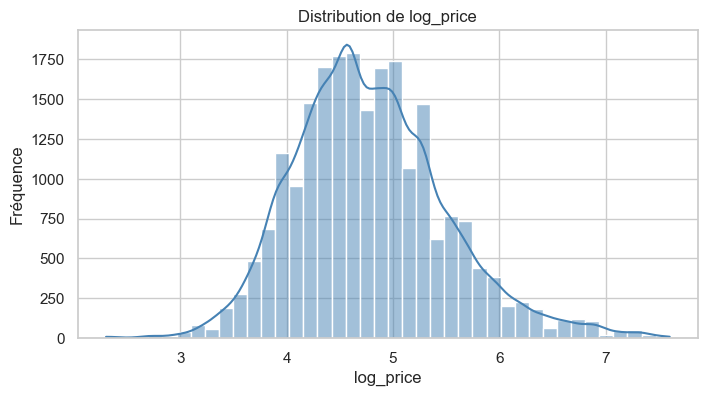

In [14]:
# --- 4. Distribution de log_price ---
plt.figure(figsize=(8, 4))
sns.histplot(train['log_price'], bins=40, kde=True, color='steelblue')
plt.title('Distribution de log_price')
plt.xlabel('log_price')
plt.ylabel('Fr√©quence')
plt.show()

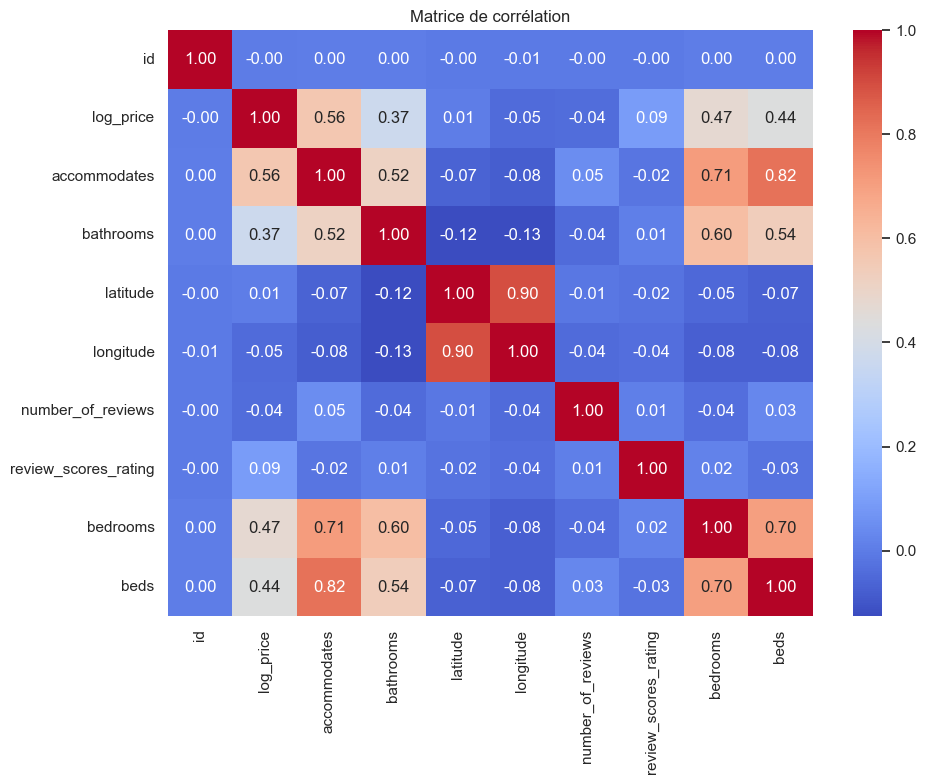

In [15]:
#Corr√©lation entre les variables num√©riques ---
plt.figure(figsize=(10, 8))
num_cols = train.select_dtypes(include=['float64', 'int64']).columns
corr_matrix = train[num_cols].corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Matrice de corr√©lation")
plt.tight_layout()
plt.show()

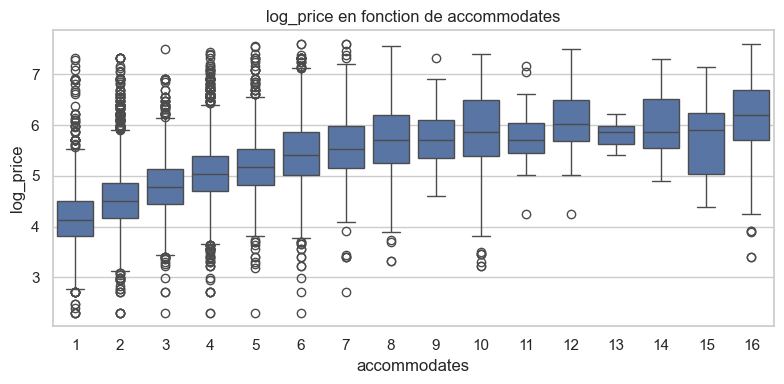

In [16]:
# --- 6. Relation entre accommodates et log_price ---
plt.figure(figsize=(8, 4))
sns.boxplot(x='accommodates', y='log_price', data=train)
plt.title("log_price en fonction de accommodates")
plt.tight_layout()
plt.show()

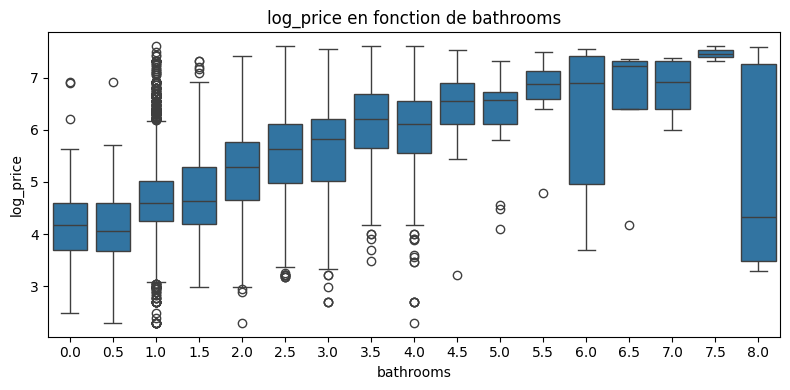

In [60]:
# --- Boxplot pour bathrooms, bedrooms ---
plt.figure(figsize=(8, 4))
sns.boxplot(x='bathrooms', y='log_price', data=train)
plt.title("log_price en fonction de bathrooms")
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 4))
sns.boxplot(x='bedrooms', y='log_price', data=train)
plt.title("log_price en fonction de bedrooms")
plt.tight_layout()
plt.show()

# --- Boxplot pour room_type ---
plt.figure(figsize=(8, 4))
sns.boxplot(x='room_type', y='log_price', data=train)
plt.title("log_price par type de chambre")
plt.tight_layout()
plt.show()


In [17]:
# --- Carte rapide avec latitude / longitude ---
plt.figure(figsize=(8, 6))
sns.scatterplot(x='longitude', y='latitude', hue='log_price', palette='coolwarm', data=train)
plt.title("Carte des logements (couleur = log_price)")
plt.tight_layout()
plt.show()


In [20]:
# --- Supprimer description, name si pas utilis√©es plus tard ---
train = train.drop(columns=['description', 'name'], errors='ignore')

# --- Nettoyage zipcode ---
train['zipcode_clean'] = train['zipcode'].astype(str).str.extract(r'(\d{5})')
train['zipcode_clean'] = pd.to_numeric(train['zipcode_clean'], errors='coerce')

# --- Nettoyage de amenities : compter le nombre d‚Äô√©quipements ---
train['amenities_count'] = train['amenities'].astype(str).apply(lambda x: len(x.strip('{}').split(',')))


etape 3 traietemnt 

In [26]:
# Installation de numpy (si n√©cessaire dans un environnement Jupyter)
%pip install numpy

import numpy as np
import pandas as pd
from datetime import datetime

# Copie du jeu de donn√©es d'entra√Ænement pour simuler un test set (√† adapter en vrai contexte)
test = train.copy()

# --- üîÅ Copie de s√©curit√© ---
train_encoded = train.copy()
test_encoded = test.copy()

# --- 1. Imputation des colonnes num√©riques par la m√©diane ---
num_cols = ['bathrooms', 'bedrooms', 'beds', 'review_scores_rating', 'number_of_reviews']
for col in num_cols:
    median_val = train_encoded[col].median()
    train_encoded[col] = train_encoded[col].fillna(median_val)
    test_encoded[col] = test_encoded[col].fillna(median_val)

# --- 2. Imputation des colonnes cat√©gorielles par le mode ---
cat_cols = ['bed_type', 'cancellation_policy', 'city', 'zipcode', 'neighbourhood']
for col in cat_cols:
    mode_val = train_encoded[col].mode(dropna=True)[0]
    train_encoded[col] = train_encoded[col].fillna(mode_val)
    test_encoded[col] = test_encoded[col].fillna(mode_val)

# --- 3. Conversion des bool√©ens 't'/'f' ou bool ‚Üí 1/0 ---
bool_cols = ['host_has_profile_pic', 'host_identity_verified', 'instant_bookable', 'cleaning_fee']
for col in bool_cols:
    train_encoded[col] = train_encoded[col].map({'t': 1, 'f': 0, True: 1, False: 0})
    test_encoded[col] = test_encoded[col].map({'t': 1, 'f': 0, True: 1, False: 0})
print(test.columns)
# --- 4. Remplissage des colonnes textuelles manquantes par 'unknown' ---


# --- 5. Transformation des dates en 'jours depuis r√©f√©rence' ---
ref_date = datetime(2022, 1, 1)
date_cols = ['host_since', 'first_review', 'last_review']
for df in [train_encoded, test_encoded]:
    for col in date_cols:
        df[col] = pd.to_datetime(df[col], errors='coerce')
        delta_col = col + '_days_since'
        df[delta_col] = (ref_date - df[col]).dt.days
        df[delta_col] = df[delta_col].fillna(df[delta_col].median())

# --- 6. Nettoyage du taux de r√©ponse (ex: '90%') ‚Üí float ---
def convert_percent(val):
    try:
        return float(val.strip('%')) if isinstance(val, str) else val
    except:
        return np.nan

for df in [train_encoded, test_encoded]:
    df['host_response_rate'] = df['host_response_rate'].apply(convert_percent)
    df['host_response_rate'] = df['host_response_rate'].fillna(train_encoded['host_response_rate'].median())

# --- 7. Encodage One-Hot des variables cat√©gorielles ---
categorical_cols = ['property_type', 'room_type', 'bed_type', 'cancellation_policy', 'city', 'neighbourhood']
train_encoded = pd.get_dummies(train_encoded, columns=categorical_cols, drop_first=True)
test_encoded = pd.get_dummies(test_encoded, columns=categorical_cols, drop_first=True)

# --- 8. Alignement des colonnes test/train (ajout de colonnes manquantes avec 0) ---
train_encoded, test_encoded = train_encoded.align(test_encoded, join='left', axis=1, fill_value=0)


825.62s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


Note: you may need to restart the kernel to use updated packages.
Index(['id', 'log_price', 'property_type', 'room_type', 'amenities',
       'accommodates', 'bathrooms', 'bed_type', 'cancellation_policy',
       'cleaning_fee', 'city', 'first_review', 'host_has_profile_pic',
       'host_identity_verified', 'host_response_rate', 'host_since',
       'instant_bookable', 'last_review', 'latitude', 'longitude',
       'neighbourhood', 'number_of_reviews', 'review_scores_rating', 'zipcode',
       'bedrooms', 'beds', 'zipcode_clean', 'amenities_count'],
      dtype='object')


Entra√Ænement, pr√©diction & cr√©ation de prediction.csv

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import missingno as msno

pd.set_option('display.max_columns', None)
sns.set(style='whitegrid')

RMSE sur l'ensemble de validation : 0.4134


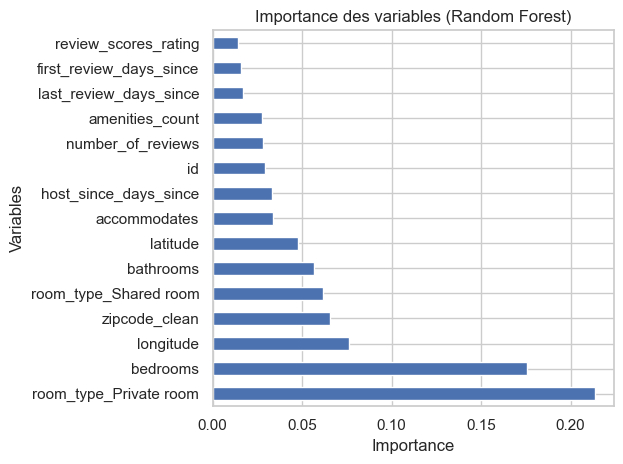

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Configuration d'affichage
pd.set_option('display.max_columns', None)
sns.set(style='whitegrid')
# D√©finition de X et y
X = train_encoded.drop(columns=['log_price'])
y = train_encoded['log_price']

# 1. Suppression des colonnes datetime
datetime_cols = X.select_dtypes(include=['datetime64[ns]']).columns
X_no_datetime = X.drop(columns=datetime_cols)

# 2. Suppression des colonnes object
object_cols = X_no_datetime.select_dtypes(include=['object']).columns
X_no_obj = X_no_datetime.drop(columns=object_cols)

# 3. Split
X_train, X_val, y_train, y_val = train_test_split(X_no_obj, y, test_size=0.2, random_state=42)

# 4. Mod√®le
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 5. √âvaluation
y_pred = model.predict(X_val)
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
print(f"RMSE sur l'ensemble de validation : {rmse:.4f}")

# 6. Importances
importances = pd.Series(model.feature_importances_, index=X_train.columns)
importances.nlargest(15).plot(kind='barh')
plt.title("Importance des variables (Random Forest)")
plt.xlabel("Importance")
plt.ylabel("Variables")
plt.tight_layout()
plt.show()


Bloc √âvaluation du mod√®le

In [36]:
# üìä Pr√©dictions sur l‚Äôensemble de validation
y_pred = model.predict(X_val)

# üìâ Calcul de l'erreur RMSE
rmse = np.sqrt(mean_squared_error(y_val, y_pred))
print(f"RMSE sur validation : {rmse:.4f}")

# üîç Exemple de comparaison r√©elle vs pr√©dite
comparison = pd.DataFrame({
    'R√©el': y_val[:5].values,
    'Pr√©dit': y_pred[:5]
})
print(comparison)


RMSE sur validation : 0.4134
       R√©el    Pr√©dit
0  5.393628  5.191656
1  3.912023  4.980054
2  5.416100  5.636876
3  3.806662  3.756765
4  5.700444  5.308405


Linear regression 

In [37]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# Remplacer les valeurs manquantes par la m√©diane
X_train_lr = X_train.fillna(X_train.median())
X_val_lr = X_val.fillna(X_train.median())

# üìå Entra√Ænement
model_lr = LinearRegression()
model_lr.fit(X_train_lr, y_train)

# üìå Pr√©diction
y_pred_lr = model_lr.predict(X_val_lr)

# üìå √âvaluation RMSE
rmse_lr = np.sqrt(mean_squared_error(y_val, y_pred_lr))
print(f"Linear Regression ‚Üí RMSE : {rmse_lr:.4f}")


Linear Regression ‚Üí RMSE : 0.4292


Decision Tree

In [38]:
from sklearn.tree import DecisionTreeRegressor

# üìå Entra√Ænement
model_dt = DecisionTreeRegressor(random_state=42)
model_dt.fit(X_train, y_train)

# üìå Pr√©diction
y_pred_dt = model_dt.predict(X_val)

# üìå √âvaluation RMSE
rmse_dt = np.sqrt(mean_squared_error(y_val, y_pred_dt))
print(f"Decision Tree ‚Üí RMSE : {rmse_dt:.4f}")


Decision Tree ‚Üí RMSE : 0.5789


Gradient Boosting

In [39]:
from sklearn.ensemble import GradientBoostingRegressor

# Remplacer les valeurs manquantes par la m√©diane
X_train_gb = X_train.fillna(X_train.median())
X_val_gb = X_val.fillna(X_train.median())

# üìå Entra√Ænement
model_gb = GradientBoostingRegressor(n_estimators=100, random_state=42)
model_gb.fit(X_train_gb, y_train)

# üìå Pr√©diction
y_pred_gb = model_gb.predict(X_val_gb)

# üìå √âvaluation RMSE
rmse_gb = np.sqrt(mean_squared_error(y_val, y_pred_gb))
print(f"Gradient Boosting ‚Üí RMSE : {rmse_gb:.4f}")


Gradient Boosting ‚Üí RMSE : 0.4156


Cr√©er le fichier prediction.csv

In [40]:
# üîß Supprimer les colonnes datetime restantes si elles existent
colonnes_a_supprimer = ['host_since', 'first_review', 'last_review']
for col in colonnes_a_supprimer:
    if col in X.columns:
        X = X.drop(columns=[col])
    if col in test_encoded.columns:
        test_encoded = test_encoded.drop(columns=[col])


In [42]:
# Nettoyer les codes postaux pour qu'ils soient num√©riques
def clean_zip(zipcode):
    try:
        return int(str(zipcode).split('-')[0])
    except:
        return np.nan

train_encoded["zipcode"] = train_encoded["zipcode"].apply(clean_zip)
test_encoded["zipcode"] = test_encoded["zipcode"].apply(clean_zip)

# Remplacer les valeurs manquantes restantes par la m√©diane
train_encoded["zipcode"].fillna(train_encoded["zipcode"].median(), inplace=True)
test_encoded["zipcode"].fillna(train_encoded["zipcode"].median(), inplace=True)


/Users/filalidhia/.pyenv/versions/3.12.3/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:1231: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)
/var/folders/z1/3rm1d4yn57l91bgfzf786y0w0000gn/T/ipykernel_99180/3541211797.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_encoded["zipcode"].fillna(train_encoded["zipcode"].median(), inplace=True)
/Users/filalidhia/.pyenv/versions/3.12.3/lib/python3.12/site-packages/numpy/lib/_nanfunctions_impl.py:1231: RuntimeWarnin

In [43]:
# --- Cr√©er une nouvelle variable 'amenities_count' ---
def count_amenities(x):
    try:
        return len(x.strip('{}').split(','))
    except:
        return 0

train_encoded["amenities_count"] = train_encoded["amenities"].apply(count_amenities)
test_encoded["amenities_count"] = test_encoded["amenities"].apply(count_amenities)

# --- Supprimer la colonne texte 'amenities' ---
train_encoded.drop(columns=["amenities"], inplace=True)
test_encoded.drop(columns=["amenities"], inplace=True)


In [47]:
from sklearn.ensemble import GradientBoostingRegressor

# S√©parer les features et la cible
X = train_encoded.drop(columns=["id", "log_price"])
y = train_encoded["log_price"]

# Filtrer pour ne garder que les colonnes num√©riques (hors texte/datetime)
X = X.select_dtypes(exclude=['object', 'datetime'])

# Aligner le jeu de test pour ne garder que les colonnes du train
test_features = test_encoded[X.columns]

# Imputation des valeurs manquantes par la m√©diane
X = X.fillna(X.median())
# Remplacement NaN par la m√©diane, en ignorant les colonnes avec toutes les valeurs manquantes
X = X.apply(lambda col: col.fillna(col.median() if not col.isna().all() else 0))
test_features = test_features.apply(lambda col: col.fillna(col.median() if not col.isna().all() else 0))
  # utiliser la m√©diane du train

# Entra√Ænement du mod√®le
final_model = GradientBoostingRegressor(n_estimators=100, random_state=42)
final_model.fit(X, y)

# Pr√©diction sur le jeu de test
y_test_pred = final_model.predict(test_features)

# G√©n√©ration du fichier de soumission
submission = pd.DataFrame({
    "id": test_encoded["id"],
    "prediction": y_test_pred
})
submission.to_csv("prediction.csv", index=False)

print("Fichier 'prediction.csv' g√©n√©r√© avec succ√®s.")


Fichier 'prediction.csv' g√©n√©r√© avec succ√®s.


## üìà Mod√©lisation avec Prophet (optionnel - pour donn√©es temporelles)
Cette section utilise [Facebook Prophet](https://facebook.github.io/prophet/) pour mod√©liser une tendance temporelle du prix (log_price), si cela est pertinent.

8291.25s - pydevd: Sending message related to process being replaced timed-out after 5 seconds


13:47:10 - cmdstanpy - INFO - Chain [1] start processing
13:47:10 - cmdstanpy - INFO - Chain [1] done processing


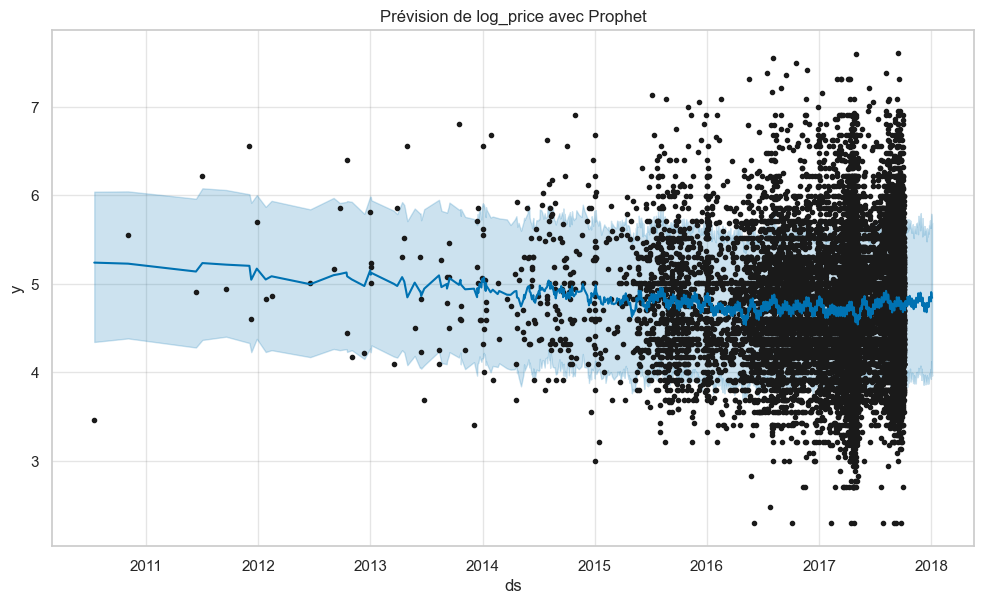

In [69]:
# üëâ Installation (si n√©cessaire)
!pip install prophet

from prophet import Prophet
df_prophet = train[['last_review', 'log_price']].dropna().copy()
df_prophet.rename(columns={'last_review': 'ds', 'log_price': 'y'}, inplace=True)

# S'assurer que la colonne de date est bien au format datetime
df_prophet['ds'] = pd.to_datetime(df_prophet['ds'])

# Initialisation et entra√Ænement du mod√®le Prophet
model = Prophet()
model.fit(df_prophet)

# G√©n√©ration de pr√©visions sur 90 jours
future = model.make_future_dataframe(periods=90)
forecast = model.predict(future)

# Visualisation des r√©sultats
fig1 = model.plot(forecast)
plt.title("Pr√©vision de log_price avec Prophet")
plt.show()

fig2 = model.plot_components(forecast)
plt.show()

In [61]:
from sklearn.metrics import mean_squared_error

# S√©parer df_prophet pour validation temporelle (80% train, 20% test)
df_prophet = df_prophet.sort_values('ds')
split_idx = int(len(df_prophet) * 0.8)
df_train_p = df_prophet.iloc[:split_idx]
df_val_p = df_prophet.iloc[split_idx:]

# R√©entra√Æner Prophet uniquement sur l'entra√Ænement
prophet_model = Prophet()
prophet_model.fit(df_train_p)

# Pr√©dire uniquement les dates de validation
future_val = df_val_p[['ds']]
forecast_val = prophet_model.predict(future_val)

# Calcul du RMSE sur la validation
rmse_prophet = np.sqrt(mean_squared_error(df_val_p['y'], forecast_val['yhat']))

# Ajouter au dictionnaire des r√©sultats
results['Prophet (last_review)'] = rmse_prophet


12:17:10 - cmdstanpy - INFO - Chain [1] start processing
12:17:11 - cmdstanpy - INFO - Chain [1] done processing


## ü§ñ Mod√®les de r√©gression supervis√©e
Nous testons ici plusieurs mod√®les pour pr√©dire `log_price` :
- **R√©gression lin√©aire**
- **Ridge** / **Lasso**
- **Random Forest**
- **XGBoost**

Les performances sont √©valu√©es via la **Root Mean Squared Error (RMSE)**.

In [63]:
# Pr√©paration des donn√©es
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

# Choix des features simples pour test
features = ['accommodates', 'bedrooms', 'beds', 'bathrooms', 'room_type', 'property_type']
X = train[features]
y = train['log_price']

numerical = ['accommodates', 'bedrooms', 'beds', 'bathrooms']
categorical = ['room_type', 'property_type']

preprocessor = ColumnTransformer([
    ('num', StandardScaler(), numerical),
    ('cat', OneHotEncoder(handle_unknown='ignore'), categorical)
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [64]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd

# D√©tection des colonnes num√©riques et cat√©gorielles
numerical = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical = X.select_dtypes(include=['object', 'bool']).columns.tolist()

# Pr√©processeur
preprocessor = ColumnTransformer([
    ('num', Pipeline([
        ('imputer', SimpleImputer(strategy='median')),
        ('scaler', StandardScaler())
    ]), numerical),
    ('cat', Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('encoder', OneHotEncoder(handle_unknown='ignore'))
    ]), categorical)
])

# Split train/val
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

# Mod√®les √† tester (XGBoost retir√©)
models = {
    'Linear Regression': LinearRegression(),
    'Ridge': Ridge(alpha=1.0),
    'Lasso': Lasso(alpha=0.1),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42)
}

# Ex√©cution
results = {}
for name, model in models.items():
    pipe = Pipeline([
        ('preprocess', preprocessor),
        ('model', model)
    ])
    pipe.fit(X_train, y_train)
    preds = pipe.predict(X_val)
    rmse = np.sqrt(mean_squared_error(y_val, preds))
    results[name] = rmse

# Affichage
print("RMSE des mod√®les :")
for k, v in results.items():
    print(f"{k}: {v:.3f}")


RMSE des mod√®les :
Linear Regression: 0.500
Ridge: 0.500
Lasso: 0.558
Random Forest: 0.506


In [65]:
# Affichage du barplot avec Prophet inclus
plt.figure(figsize=(10, 5))
plt.barh(list(results.keys()), list(results.values()), color='steelblue')
plt.xlabel("RMSE")
plt.title("Comparaison des performances des mod√®les (avec Prophet)")
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [66]:
import matplotlib.pyplot as plt
import seaborn as sns

# Identifier le meilleur mod√®le (celui avec le plus petit RMSE, hors Prophet si tu veux le comparer √† part)
best_model_name = min(
    [k for k in results.keys() if 'Prophet' not in k],
    key=lambda k: results[k]
)

print(f"Meilleur mod√®le supervis√© : {best_model_name}")

# R√©entra√Æner le meilleur mod√®le sur tout le train/val
best_model = models[best_model_name]
pipe = Pipeline([
    ('preprocess', preprocessor),
    ('model', best_model)
])
pipe.fit(X_train, y_train)
y_val_pred = pipe.predict(X_val)

# Calcul des r√©sidus
residuals = y_val - y_val_pred

# Affichage des r√©sidus
plt.figure(figsize=(8, 4))
sns.histplot(residuals, bins=40, kde=True)
plt.axvline(0, color='red', linestyle='--')
plt.title(f"Distribution des r√©sidus - {best_model_name}")
plt.xlabel("Erreur de pr√©diction (r√©sidu)")
plt.ylabel("Fr√©quence")
plt.tight_layout()
plt.show()


Meilleur mod√®le supervis√© : Linear Regression


In [67]:
plt.figure(figsize=(8, 5))
plt.scatter(y_val_pred, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Valeurs pr√©dites")
plt.ylabel("R√©sidus")
plt.title(f"R√©sidus en fonction des pr√©dictions - {best_model_name}")
plt.tight_layout()
plt.show()
